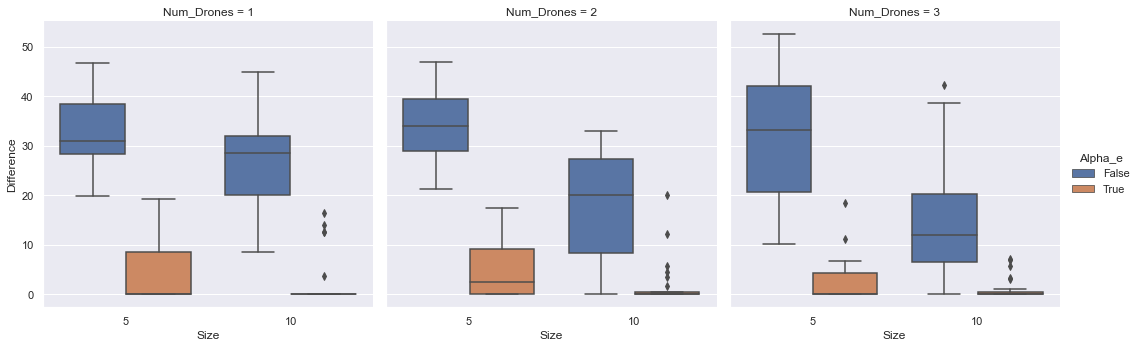

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import openpyxl
import matplotlib
import tikzplotlib

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

asynchronous_data_with = pd.read_csv('asynchronous_results_with.csv')
asynchronous_data_with[['Size', 'Instance', 'Capacity', 'Num_Drones']] = asynchronous_data_with[['Size', 'Instance', 'Capacity', 'Num_Drones']].apply(np.int64)
asynchronous_data_without = pd.read_csv('asynchronous_results_without.csv')
asynchronous_data_without[['Size', 'Instance', 'Capacity', 'Num_Drones']] = asynchronous_data_without[['Size', 'Instance', 'Capacity', 'Num_Drones']].apply(np.int64)
asynchronous_objval = pd.read_csv('asynchronous_results_with_timeandobjval.csv')
total_time = asynchronous_objval['Runtime'] + asynchronous_objval['HeurTime']
asynchronous_data_with['HeurVal'] = asynchronous_objval['HeurVal']
asynchronous_data_with['ObjVal'] = asynchronous_data_with[['HeurVal','ObjVal']].min(axis=1)
asynchronous_data_with['HeurTime'] = total_time
asynchronous_data_with.to_excel('asynchronous_results_with_corrected.xlsx')
asynchronous_data_with['Difference'] = (asynchronous_data_with['HeurVal'] - asynchronous_data_with['ObjVal'])/(asynchronous_data_with['HeurVal']) * 100

asynchronous_data_without = asynchronous_data_without.rename(columns={'GAP':'Gap wi'})
asynchronous_data_with = asynchronous_data_with.rename(columns={'GAP':'Gap i', 'HeurTime': 'TimeH'})

# comparador = pd.concat([point_gurobi, polygonal_gurobi])
asynchronous_data_without[['Size', 'Instance', 'Capacity', 'Num_Drones']] = asynchronous_data_without[['Size', 'Instance', 'Capacity', 'Num_Drones']].apply(np.int64)
asynchronous_data_with[['Size', 'Instance', 'Capacity', 'Num_Drones']] = asynchronous_data_with[['Size', 'Instance', 'Capacity', 'Num_Drones']].apply(np.int64)

tabla_medias_without = asynchronous_data_without.groupby(['Size', 'Capacity', 'Num_Drones', 'Alpha_e']).mean()[['Gap wi']].round(2).reset_index()
tabla_notnan_without = asynchronous_data_without.groupby(['Size', 'Capacity', 'Num_Drones', 'Alpha_e']).count()[['Gap wi']].round(2).reset_index()

tabla_medias_with = asynchronous_data_with.groupby(['Size', 'Capacity', 'Num_Drones', 'Alpha_e']).mean()[['Gap i', 'TimeH']].round(2).reset_index()
matplotlib.rcParams['axes.unicode_minus'] = False
asynchronous_data_with[['Size', 'Instance', 'Capacity', 'Num_Drones']] = asynchronous_data_with[['Size', 'Instance', 'Capacity', 'Num_Drones']].apply(np.int64)
sns.set(style="darkgrid")
g = sns.catplot(x = 'Size', y = 'Difference', kind = 'box', col = 'Num_Drones', hue = 'Alpha_e', data = asynchronous_data_with, aspect = 1, sharey = True, legend = True)
tikzplotlib.save('gap_between_algorithms_asynchronous.tex')
plt.savefig('gap_between_algorithms_asynchronous.png')

datos = pd.DataFrame()

datos['Size'] = tabla_medias_without['Size']
datos['Capacity'] = tabla_medias_without['Capacity']
datos['Num_Drones'] = tabla_medias_without['Num_Drones']
datos['Alpha_e'] = tabla_medias_without['Alpha_e']
datos['Gap wi'] = tabla_medias_without['Gap wi']
datos['Unsolved'] = 5 - tabla_notnan_without['Gap wi']
datos['TimeH'] = tabla_medias_with['TimeH']
datos['Gap i'] = tabla_medias_with['Gap i']

datos.pivot(index=['Capacity', 'Num_Drones', 'Alpha_e'], columns = ['Size']).to_excel('table_asynchronous.xlsx')

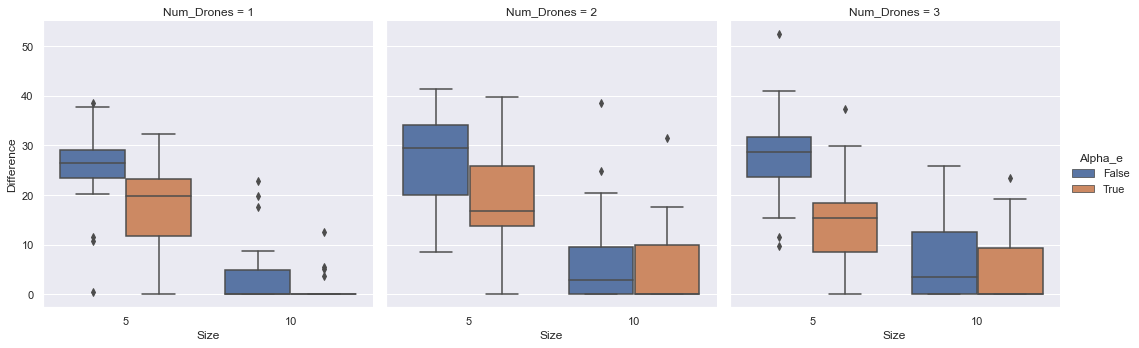

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import openpyxl
import matplotlib
import tikzplotlib

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

synchronous_data_with = pd.read_csv('synchronous_withoutd_results_with.csv')
synchronous_data_with[['Size', 'Instance', 'Capacity', 'Num_Drones']] = synchronous_data_with[['Size', 'Instance', 'Capacity', 'Num_Drones']].apply(np.int64)
synchronous_data_without = pd.read_csv('synchronous_withoutd_results_without.csv')
synchronous_data_without[['Size', 'Instance', 'Capacity', 'Num_Drones']] = synchronous_data_without[['Size', 'Instance', 'Capacity', 'Num_Drones']].apply(np.int64)
synchronous_objval = pd.read_csv('synchronous_results_with_timeandobjval.csv')
total_time = synchronous_objval['Runtime'] + synchronous_objval['HeurTime']
synchronous_data_with['HeurVal'] = synchronous_objval['HeurVal']
synchronous_data_with['ObjVal'] = synchronous_data_with[['HeurVal','ObjVal']].min(axis=1)
synchronous_data_with['HeurTime'] = total_time
synchronous_data_with.to_excel('synchronous_withoutd_results_with_corrected.xlsx')
synchronous_data_with['Difference'] = (synchronous_data_with['HeurVal'] - synchronous_data_with['ObjVal'])/(synchronous_data_with['HeurVal']) * 100

synchronous_data_without = synchronous_data_without.rename(columns={'GAP':'Gap wi'})
synchronous_data_with = synchronous_data_with.rename(columns={'GAP':'Gap i', 'HeurTime': 'TimeH'})

# comparador = pd.concat([point_gurobi, polygonal_gurobi])
synchronous_data_without[['Size', 'Instance', 'Capacity', 'Num_Drones']] = synchronous_data_without[['Size', 'Instance', 'Capacity', 'Num_Drones']].apply(np.int64)
synchronous_data_with[['Size', 'Instance', 'Capacity', 'Num_Drones']] = synchronous_data_with[['Size', 'Instance', 'Capacity', 'Num_Drones']].apply(np.int64)

tabla_medias_without = synchronous_data_without.groupby(['Size', 'Capacity', 'Num_Drones', 'Alpha_e']).mean()[['Gap wi']].round(2).reset_index()
tabla_notnan_without = synchronous_data_without.groupby(['Size', 'Capacity', 'Num_Drones', 'Alpha_e']).count()[['Gap wi']].round(2).reset_index()

tabla_medias_with = synchronous_data_with.groupby(['Size', 'Capacity', 'Num_Drones', 'Alpha_e']).mean()[['Gap i', 'TimeH']].round(2).reset_index()
matplotlib.rcParams['axes.unicode_minus'] = False
synchronous_data_with[['Size', 'Instance', 'Capacity', 'Num_Drones']] = synchronous_data_with[['Size', 'Instance', 'Capacity', 'Num_Drones']].apply(np.int64)
sns.set(style="darkgrid")
g = sns.catplot(x = 'Size', y = 'Difference', kind = 'box', col = 'Num_Drones', hue = 'Alpha_e', data = synchronous_data_with, aspect = 1, sharey = True, legend = True)
tikzplotlib.save('gap_between_algorithms_synchronous_withoutd.tex')
plt.savefig('gap_between_algorithms_synchronous_withoutd.png')

datos = pd.DataFrame()

datos['Size'] = tabla_medias_without['Size']
datos['Capacity'] = tabla_medias_without['Capacity']
datos['Num_Drones'] = tabla_medias_without['Num_Drones']
datos['Alpha_e'] = tabla_medias_without['Alpha_e']
datos['Gap wi'] = tabla_medias_without['Gap wi']
datos['Unsolved'] = 5 - tabla_notnan_without['Gap wi']
datos['TimeH'] = tabla_medias_with['TimeH']
datos['Gap i'] = tabla_medias_with['Gap i']

datos.pivot(index=['Capacity', 'Num_Drones', 'Alpha_e'], columns = ['Size']).to_excel('table_synchronous.xlsx')